In [0]:
%matplotlib inline

import numpy as np
import os
import cv2
import dlib
import imutils
import zipfile as zf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from google.colab.patches import cv2_imshow

sns.set()


In [0]:
filepath_prototxt = '/content/deploy.prototxt.txt'
filepath_model = '/content/res10_300x300_ssd_iter_140000.caffemodel'


In [0]:
net = cv2.dnn.readNetFromCaffe(filepath_prototxt , filepath_model)


In [0]:
filepath_test1 = '/content/rooster.jpg'
filepath_test2 = '/content/iron_chic.jpg'
filepath_test3 = '/content/friends2.jpg'
filepath_test4 = '/content/friends_limo.jpg'
filepath_test5 = '/content/fam.jpeg'
filepath_test6 = '/content/group2.jpeg'

In [0]:
image = cv2.imread(filepath_test4)
(h,w) = image.shape[:2]

blob = cv2.dnn.blobFromImage(cv2.resize(image,(300,300)), 1.0 ,(300,300) ,(104.0, 177.0, 123.0) )

In [0]:
net.setInput(blob)
detections = net.forward()

In [88]:
detections.shape

(1, 1, 200, 7)

In [0]:
conf = 0.5

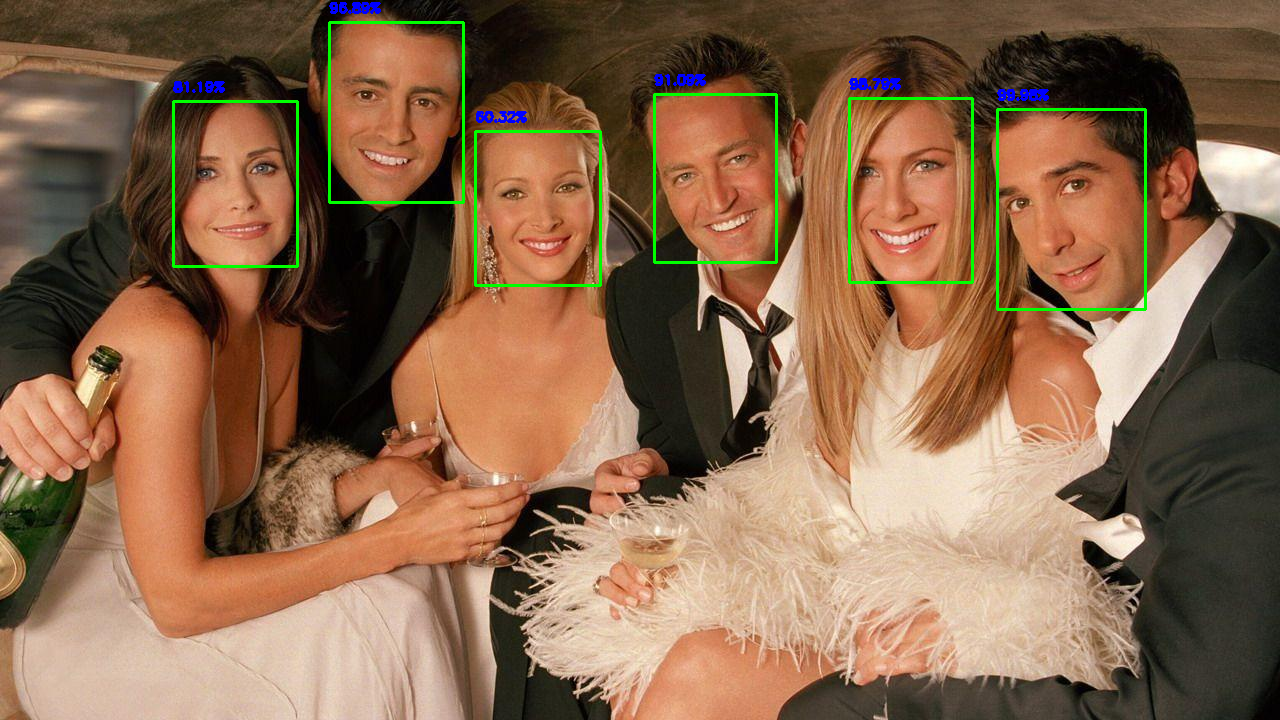

-1

In [90]:
for i in range(0 ,detections.shape[2]):

  confidence = detections[0,0,i,2]

  if confidence > conf:
    box = detections[0,0,i,3:7]* np.array([w,h,w,h])
    (startX , startY , endX, endY) = box.astype("int")

    text = "{:.2f}%".format(confidence * 100)

    y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.rectangle(image , (startX , startY) , (endX,endY) , (0,255,0) , 2)

    cv2.putText(image , text , (startX , y) , cv2.FONT_HERSHEY_SIMPLEX , 0.45 , (255,0,0), 2 )

cv2_imshow(image)
cv2.waitKey(0)

